In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import linearRegression as lr
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.precision", 2)

In [3]:
missing=[pd.NA,(float)(-200),(int)(-200),-200]
df= pd.read_excel("AirQualityUCI.xlsx",na_values=missing)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.88,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.88,0.76
1,2004-03-10,19:00:00,2.0,1292.25,112,9.40,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.70,0.73
2,2004-03-10,20:00:00,2.2,1402.00,88,9.00,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.98,0.75
3,2004-03-10,21:00:00,2.2,1375.50,80,9.23,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.00,0.79
4,2004-03-10,22:00:00,1.6,1272.25,51,6.52,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.58,0.79


In [5]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [6]:
print(df.shape)

(9357, 15)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [8]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.00,8991.00,9357.00,8991.00,8991.00,7718.00,8991.00,7715.00,8991.00,8991.00,8991.00,8991.00,8991.00
mean,2.15,1099.71,-159.09,10.08,939.03,246.88,835.37,113.08,1456.14,1022.78,18.32,49.23,1.03
std,1.45,217.08,139.79,7.45,266.83,212.97,256.82,48.36,346.20,398.48,8.83,17.32,0.40
min,0.10,647.25,-200.00,0.15,383.25,2.00,322.00,2.00,551.00,221.00,-1.90,9.18,0.18
25%,1.10,936.75,-200.00,4.44,734.38,98.00,657.88,78.00,1226.62,731.38,11.79,35.81,0.74
50%,1.80,1063.00,-200.00,8.24,909.00,179.80,805.50,109.00,1462.75,963.25,17.75,49.55,1.00
75%,2.90,1231.25,-200.00,13.99,1116.25,326.00,969.25,142.00,1673.50,1273.38,24.40,62.50,1.31
max,11.90,2039.75,1189.00,63.74,2214.00,1479.00,2682.75,339.70,2775.00,2522.75,44.60,88.73,2.23


In [9]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)            0
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [10]:
df.nunique()

Date              391
Time               24
CO(GT)             96
PT08.S1(CO)      3245
NMHC(GT)          430
C6H6(GT)         3772
PT08.S2(NMHC)    3772
NOx(GT)          2466
PT08.S3(NOx)     3518
NO2(GT)          1419
PT08.S4(NO2)     4407
PT08.S5(O3)      4678
T                3367
RH               4902
AH               8987
dtype: int64

In [11]:
df1=df.drop(['CO(GT)','NOx(GT)','NO2(GT)','NMHC(GT)'],axis=1)

In [12]:
df1.isnull().sum()

Date               0
Time               0
PT08.S1(CO)      366
C6H6(GT)         366
PT08.S2(NMHC)    366
PT08.S3(NOx)     366
PT08.S4(NO2)     366
PT08.S5(O3)      366
T                366
RH               366
AH               366
dtype: int64

In [13]:
df1[df1==-200].count()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
df2=df1.dropna(axis=0)

In [15]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8991 non-null   datetime64[ns]
 1   Time           8991 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   PT08.S3(NOx)   8991 non-null   float64       
 6   PT08.S4(NO2)   8991 non-null   float64       
 7   PT08.S5(O3)    8991 non-null   float64       
 8   T              8991 non-null   float64       
 9   RH             8991 non-null   float64       
 10  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 842.9+ KB


In [16]:
df2.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [17]:
df2.nunique()

Date              383
Time               24
PT08.S1(CO)      3245
C6H6(GT)         3772
PT08.S2(NMHC)    3772
PT08.S3(NOx)     3518
PT08.S4(NO2)     4407
PT08.S5(O3)      4678
T                3367
RH               4902
AH               8987
dtype: int64

In [18]:
df2=df2.drop_duplicates()

In [19]:
corelation=df2.corr()

<AxesSubplot:>

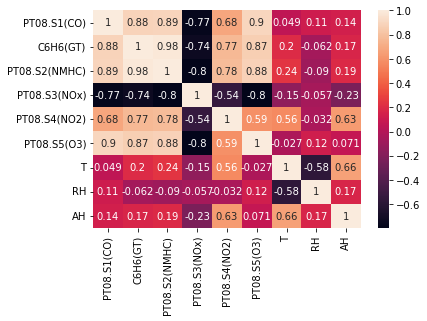

In [20]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

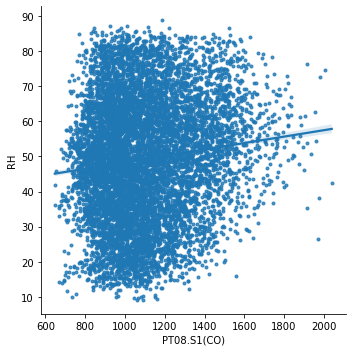

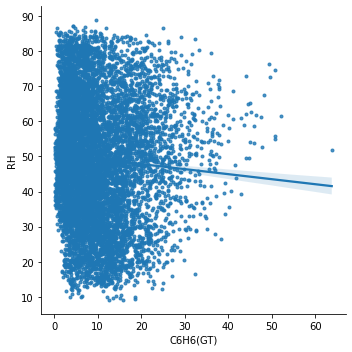

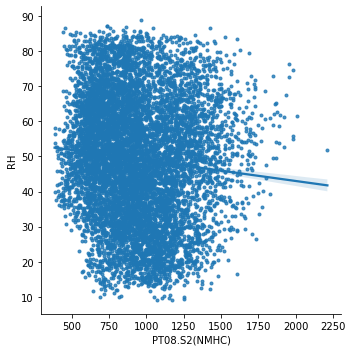

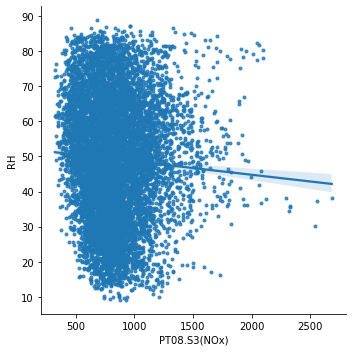

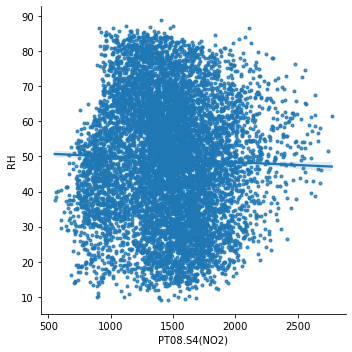

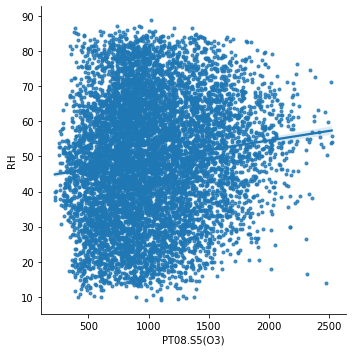

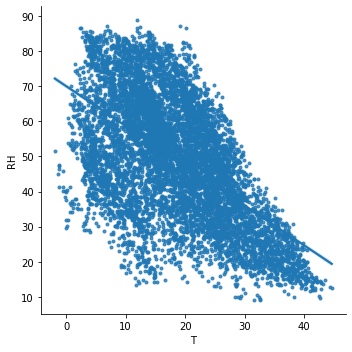

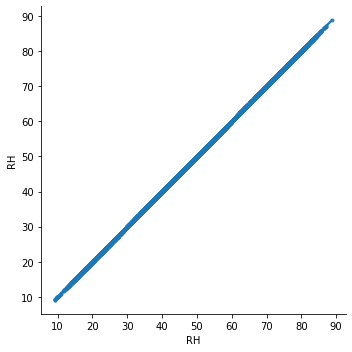

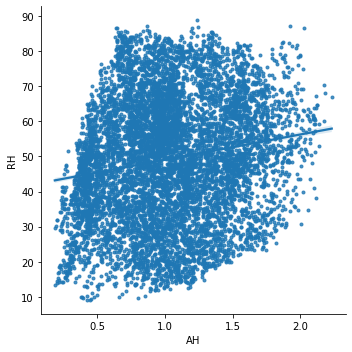

In [21]:
col_=df2.columns.tolist()[2:]
for i in df2.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df2,markers='.')

In [22]:
df2.dtypes

Date             datetime64[ns]
Time                     object
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
PT08.S3(NOx)            float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [23]:
df2['Date']=df2.Date.dt.month

In [24]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18:00:00,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19:00:00,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20:00:00,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21:00:00,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22:00:00,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [25]:
df2.dtypes

Date               int64
Time              object
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
PT08.S3(NOx)     float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [26]:
df2['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S')

In [27]:
df2.dtypes

Date                      int64
Time             datetime64[ns]
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
PT08.S3(NOx)            float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [28]:
df2['Time']=df2.Time.dt.hour.astype(int)

In [29]:
df2.dtypes

Date               int64
Time               int32
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
PT08.S3(NOx)     float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [30]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [31]:
df2.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [32]:
df2.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,1360.00,11.88,1045.50,1056.25,1692.00,1267.50,13.60,48.88,0.76
1,3,19,1292.25,9.40,954.75,1173.75,1558.75,972.25,13.30,47.70,0.73
2,3,20,1402.00,9.00,939.25,1140.00,1554.50,1074.00,11.90,53.98,0.75
3,3,21,1375.50,9.23,948.25,1092.00,1583.75,1203.25,11.00,60.00,0.79
4,3,22,1272.25,6.52,835.50,1205.00,1490.00,1110.00,11.15,59.58,0.79


In [33]:
y=df2['RH'].to_numpy()
X=df2.drop('RH',1)
x=X.to_numpy()

C:\Users\Rutvik\AppData\Local\Temp\ipykernel_27012\3183830610.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df2.drop('RH',1)


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [35]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
x_train=np.append(np.ones((x_train.shape[0],1)),x_train,axis=1)
x_train[0]

array([ 1.        , -0.09700333,  0.22454289,  0.10482764,  0.95919487,
        1.04003216, -0.50387898,  1.3191793 ,  0.25340256,  1.48365579,
        0.29096169])

In [37]:
y_train=y_train.reshape((-1,1))

In [38]:
theta=lr.fitNormal(x_train,y_train)

In [39]:
theta

array([[ 49.22899003],
       [  1.73596981],
       [ -0.80872585],
       [  3.53220683],
       [ -4.43451286],
       [ -1.07817173],
       [ -0.74454498],
       [  4.55742766],
       [ -0.86869941],
       [-20.74827038],
       [ 13.26496841]])

In [40]:
x_test=np.append(np.ones((x_test.shape[0],1)),x_test,axis=1)
x_test[0]

array([ 1.        , -0.68490888,  1.52595875,  0.22146655, -0.19607258,
       -0.05461995,  0.03198716,  0.34393879,  0.36816924,  0.13973225,
        0.23543322])

In [44]:

x_train = np.transpose(x_train)
m = x_train.shape[0]
x_train = np.concatenate([np.ones(m).reshape(m, 1), x_train], axis=1)
y_train = np.transpose(y_train)
print(x_train)
theta_in1 = np.ones(x_train.shape[1])

[[ 1.          1.         -0.09700333 ...  0.25340256  1.48365579
   0.29096169]
 [ 1.          1.         -0.68490888 ... -0.53546074 -0.58326465
  -0.23390407]
 [ 1.          1.          1.37276055 ...  0.97227078 -0.27421894
   0.07904503]
 ...
 [ 1.          1.          1.07880777 ...  0.72697277  0.26731992
   0.95994826]
 [ 1.          1.         -0.68490888 ...  1.08136219 -0.42165359
   0.57085054]
 [ 1.          1.         -1.5667672  ... -0.11612094 -1.29208512
  -0.93239482]]


In [46]:
x_test = np.transpose(x_test)
n = x_test.shape[0]
x_test = np.concatenate([np.ones(n).reshape(n, 1), x_test], axis=1)


In [48]:
x_test

array([[ 1.        ,  1.        , -0.68490888, ...,  0.36816924,
         0.13973225,  0.23543322],
       [ 1.        ,  1.        , -0.97886165, ...,  2.16407863,
         0.03199145, -0.10033529],
       [ 1.        ,  1.        ,  1.07880777, ...,  0.26349193,
         0.1198852 ,  1.32793367],
       ...,
       [ 1.        ,  1.        ,  1.66671332, ..., -0.46672684,
        -0.73636989,  0.11650181],
       [ 1.        ,  1.        , -0.68490888, ..., -0.63320159,
        -0.29123064,  0.0477718 ],
       [ 1.        ,  1.        , -1.27281442, ..., -1.11433884,
        -1.36013187, -1.33562171]])

In [50]:
theta_up = lr.fitGD(x_train, y_train, 0.01, 0, 1, 100, theta_in1 )
theta_up

8091
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


ValueError: setting an array element with a sequence.